In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

businesses = pd.read_csv('/kaggle/input/yelp-575/businesses.csv' , sep='\t', encoding = 'ISO-8859-1')
reviews_train = pd.read_csv('/kaggle/input/yelp-575/reviews_train.csv', sep='\t', encoding = 'ISO-8859-1')
reviews_test=pd.read_csv('/kaggle/input/yelp-575/reviews_test_all.csv', sep='\t', encoding = 'ISO-8859-1')

In [2]:
businesses

,Unnamed: 0,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",NaN
1,1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,XwEzff2lxcn2MoWdRaMqUg,The Groom Room,210 Louise Ave,Nashville,TN,37203,36.151926,-86.804949,4.5,23,1,"{'BusinessAcceptsCreditCards': 'True', 'Busine...","Waxing, Spray Tanning, Permanent Makeup, Eyela...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-19:0', ..."
99996,99996,BjRz_MdoqUn6FYDsjAqn6Q,61Five Health & Wellness,1913 Church St,Nashville,TN,37203,36.153587,-86.799671,5.0,78,1,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...","IV Hydration, Beauty & Spas, Medical Centers, ...","{'Monday': '0:0-0:0', 'Tuesday': '10:0-18:0', ..."
99997,99997,2pWRW7ASh_Bw5q5V64Luuw,Ridge Carlton Apartments,7373 Ridge Ave,Philadelphia,PA,19128,40.047768,-75.234005,2.5,9,1,{'BusinessAcceptsCreditCards': 'True'},"Real Estate, Home Services, Apartments, Real E...","{'Monday': '9:0-17:0', 'Tuesday': '9:0-17:0', ..."
99998,99998,ccwhUs2fCLWTQLMa1L_xNQ,China Buffet,57 Fenton Plz,Fenton,MO,63026,38.511352,-90.442368,2.0,10,0,"{'RestaurantsAttire': ""u'casual'"", 'GoodForKid...","Chinese, Restaurants",NaN


In [3]:
reviews_train

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,A-8BBGnBoz5-K1WaM5Cgaw,DUxCdkXnwYEzHZvT8MyvIw,ju4YP8SLdR_BmWr_-Xh83Q,5,2,0,1,Best pho in Santa Barbara County. Staff are g...,2018-07-27 00:09:23
1,k--beJRNBZzFklRoppa2MA,SAgf1IxxuomOWSIDzy07pQ,uE40984_YDgVvPeRpFcCaQ,5,0,0,0,We came for the hot chicken but were won over ...,2014-02-26 13:05:47
2,qmr304jvtYetK5i_Djrx_A,cMkPQZVDOibs2bz8St7Acg,JvawJ9bSr22xn4R9oLvl_w,3,0,0,0,I really should have used my better judgement ...,2014-02-26 22:33:39
3,KXNdht_of5t-Dh1eoaeYHQ,9m13F_RCcz_r48tQH82I5A,bdfZdB2MTXlT6-RBjSIpQg,3,0,0,0,This place is relatively smaller than other ph...,2013-12-09 08:12:28
4,asJ8k1sm8jO01bi-s5JW8g,goySBsZ3QJfSaElPIDIzLw,14ZGwnDyydXdSBsLXpSUrA,5,0,0,0,Best Southeast restaurant in Philadelphia. The...,2011-06-03 03:54:54
...,...,...,...,...,...,...,...,...,...
79994,50xKaQF44me5ro2I05A8LQ,Rr0RaI3LZFRy52Sj-v1V9w,jlkDIOPoRP9SJXTkRVpkMQ,5,0,0,0,I never knew this place existed until a co-wor...,2017-02-21 05:00:35
79995,ZmafapndVYgbijrtOfKUPg,mKbOiJo69uc5qv8PyxFLPQ,HCqmx4ENAZ76SAjoalj-MQ,5,0,0,0,I love this place! Always friendly staff with ...,2017-09-11 00:51:06
79996,MmzZ7amlqBy_W1_e1Atk-A,dVoLh9JGZwpNbJPew2UIZQ,uTq9qVkOuxjBPjqC7K0XYA,5,0,0,0,This place is rocking my world!! Best breakfas...,2015-07-23 14:35:27
79997,XBS8aZVDSXTUi_g7ubpFcg,oRKaiGmDlGf2xXOBJbP3tQ,IHd8_cnLZe5oILE_oKy-5g,4,0,0,0,I kept going back and forth on what to rate th...,2015-06-22 17:35:44


In [4]:
reviews_test

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,37039,8QSAs3yVhcNS0y1fWSn41Q,BY_7xEliSP5iEig9bemaKw,e86IBzGCsrnhJbD_wELj7w,3,1,0,0,The main course was actually very tasty and th...,2011-01-16 20:23:33
1,19778,-lNpxdJNrvMtZ_RTvT2NtA,djOl6zKvKdbt4lNnDKUXJg,z22hSRptt_DS0nWjsIka2A,5,0,0,0,Outback is my favorite steakhouse. I've dined ...,2015-05-13 17:03:27
2,80124,7Ylcy1txacpnY76275KqQw,1iokf9rM43YAwxsa8bp1OQ,jRLskcm_icZIKs81mYC4iQ,4,5,3,3,"I absolutely love Ethiopian, I'd eat it every ...",2015-04-22 17:26:46
3,35507,9JrJF-YHl44WJtZxaArteQ,NbcOw8Scs1AQcRR9uzlCPw,H47H_73y7aZ9KHpzct-xBg,4,0,0,0,"I was pleasantly surprised by this place , I l...",2018-05-20 00:10:30
4,35251,r3GB-Kg5UL_tOKdkM-nZvA,yymYLENYLOHwDRAxZvU3vA,B-DiQpcSTJ7oMMnwzbAGTQ,5,0,0,0,"Omg omg, I would marry the man that would brin...",2018-07-09 23:56:46
...,...,...,...,...,...,...,...,...,...,...
19995,41289,mh1t_sstIjoayHr_Jpxjhw,wLX6F5uCTcsZHAiYHUtf9g,dChRGpit9fM_kZK5pafNyA,5,3,1,3,I tried this place for the first time recently...,2018-02-14 03:37:21
19996,5043,ondStxgo7eh21e334_jMIA,pjRhtgq9hIGvv2y9dOet6g,gABEjWGwhojrub_tXqE2uw,4,0,0,1,We were told to go here by a friend. They did ...,2014-05-26 18:58:00
19997,69117,vNqb5X_Cm2IEPN7OtcDhUw,oSuBxsjEirVuMKdvic259w,dYYkzkiAQoOtRjdR0kcspw,4,0,0,0,We stopped by in the afternoon on a weekday. T...,2018-04-05 13:41:26
19998,30690,EcZokPtPu2HuvuCxLVLyLQ,zmAegFGE5Z9jr1ey_n_qjQ,geUiM_VTRmUz6dViO7E-jg,2,0,0,0,Always looking for a good pizza place so had h...,2017-02-09 04:37:53


# TASK 1:

# Text Preprocessing

Light preprocessing, by downcasesing words and removing tokens too short or too long in addition to stopwords. It is applied to each 'text' entry in training data

In [5]:
import re
import nltk
from nltk.corpus import stopwords

In [6]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
stop_words = set(stopwords.words('english'))

def tokenize_text(text):
    token_list = []
    text_str = re.sub(r'[^\w\s]', '', text.lower())
    for word in nltk.tokenize.word_tokenize(text_str):
        if word not in stop_words and len(word) > 1 and len(word) < 20:
            token_list.append(word)
    return token_list

text1 = "We went for Sunday Brunch, highly recommended. They take reservations  which was great for us since we were a group of 7. This was my favorite restaurant in Nashville. I had the breakfast burrito and I have been craving another one ever since! But really, I don't think you can go wrong with anything on the menu! The service was great, a little slow but it was a busy Sunday morning. I'm looking forward to the next time I am in town so I can try it for dinner!"
tokenize_text(text1)

['went',
 'sunday',
 'brunch',
 'highly',
 'recommended',
 'take',
 'reservations',
 'great',
 'us',
 'since',
 'group',
 'favorite',
 'restaurant',
 'nashville',
 'breakfast',
 'burrito',
 'craving',
 'another',
 'one',
 'ever',
 'since',
 'really',
 'dont',
 'think',
 'go',
 'wrong',
 'anything',
 'menu',
 'service',
 'great',
 'little',
 'slow',
 'busy',
 'sunday',
 'morning',
 'im',
 'looking',
 'forward',
 'next',
 'time',
 'town',
 'try',
 'dinner']

In [8]:
doc = reviews_train.text.apply(tokenize_text)
print (doc[0])
print (doc[11])

['best', 'pho', 'santa', 'barbara', 'county', 'staff', 'great', 'drive', '3540', 'minutes', 'pho', 'would', 'drive', 'double', 'seriously', 'tho', 'pho', 'withdrawals', 'thanks', 'phamous']
['place', 'awesome', 'right', 'walk', 'ur', 'overwhelmed', 'many', 'options', 'available', 'hard', 'choose', 'guy', 'helped', 'us', 'friendly', 'made', 'polite', 'conversation', 'lets', 'talk', 'actual', 'gelato', 'good', 'quality', 'amazing', 'especially', 'liked', 'lotus', 'cookie', 'mango', 'outside', 'place', 'hopping', 'makes', 'feel', 'like', 'ur', 'somewhere', 'tucson', 'come']


# 1. Best restaurants in Toronto

In [9]:
toronto_best_restaurants = businesses[
    (businesses['city'].str.lower() == 'toronto') & 
    (businesses['categories'].str.contains('Restaurants', case=False, na=False)) &
    (businesses['review_count'] > 3000) & 
    (businesses['stars'] >= 4.5)
]

sorted_toronto_best_restaurants = toronto_best_restaurants.sort_values(
    by=['stars', 'review_count', 'name'],
    ascending=[False, False, True]
).head(5)

# Show the top 5 restaurants
result_toronto_best_restaurants = sorted_toronto_best_restaurants[['name', 'stars', 'review_count', 'categories']]
result_toronto_best_restaurants

,name,stars,review_count,categories


In [10]:
(businesses['city'] == 'Toronto') & (businesses['categories'].str.contains('Restaurants'))

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Length: 100000, dtype: bool

In [11]:
toronto_restaurants = businesses[(businesses['city'] == 'Toronto') & (businesses['categories'].str.contains('Restaurants'))]
print(toronto_restaurants)
sorted_toronto_restaurants = toronto_restaurants.sort_values(by=['stars', 'review_count', 'name'], ascending=[False, False, True])

# Displaying the top 5
print(sorted_toronto_restaurants[['name', 'stars', 'review_count', 'categories']].head(5))
sorted_toronto_restaurants

Empty DataFrame
Columns: [Unnamed: 0, business_id, name, address, city, state, postal_code, latitude, longitude, stars, review_count, is_open, attributes, categories, hours]
Index: []
Empty DataFrame
Columns: [name, stars, review_count, categories]
Index: []


,Unnamed: 0,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours


# 2. Best Chinese Restaurants in Las Vegas

In [12]:
lv_chinese_restaurants = businesses[(businesses['city'] == 'Las Vegas') & (businesses['categories'].str.contains('Chinese')) & (businesses['review_count'] > 1000) & (businesses['stars'] >= 4.0)]
sorted_lv_chinese_restaurants = lv_chinese_restaurants.sort_values(by=['stars', 'review_count', 'name'], ascending=[False, False, True])
print(sorted_lv_chinese_restaurants[['name', 'stars', 'review_count', 'categories']].head(5))
sorted_lv_chinese_restaurants

Empty DataFrame
Columns: [name, stars, review_count, categories]
Index: []


,Unnamed: 0,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours


# 3. Pubs in Philadelphia that are WheelchairAccessible

In [13]:
((businesses['city'] == 'Philadelphia') & (businesses['categories'].str.contains('Pubs')))

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Length: 100000, dtype: bool

In [14]:
((businesses['city'] == 'Philadelphia') & (businesses['categories'].str.contains('Pubs')) & (businesses['attributes'].str.contains("'WheelchairAccessible': True")))

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Length: 100000, dtype: bool

In [15]:
philly_pubs_accessible = businesses[(businesses['city'] == 'Philadelphia') & (businesses['categories'].str.contains('Pubs')) & (businesses['attributes'].str.contains("'WheelchairAccessible': True"))]
sorted_philly_pubs_accessible = philly_pubs_accessible.sort_values(by=['stars', 'review_count', 'name'], ascending=[False, False, True])
print(sorted_philly_pubs_accessible[['name', 'stars', 'review_count', 'categories']].head(5))
sorted_philly_pubs_accessible

Empty DataFrame
Columns: [name, stars, review_count, categories]
Index: []


,Unnamed: 0,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours


In [16]:
def parse_attributes(attr):
    try:
        attr_dict = eval(attr.replace('\'', '\"'))
        return attr_dict.get('WheelchairAccessible', 'False') == 'True'
    except:
        return False

businesses['wheelchair_accessible'] = businesses['attributes'].apply(parse_attributes)
philly_pubs_accessible = businesses[
    (businesses['city'] == 'Philadelphia') &
    (businesses['categories'].str.contains('Pubs')) &
    (businesses['categories'])
]
sorted_philly_pubs_accessible = philly_pubs_accessible.sort_values(
    by=['stars', 'review_count', 'name'],
    ascending=[False, False, True]
)

# Displaying the top 5 results
result = sorted_philly_pubs_accessible[['name', 'stars', 'review_count', 'categories']]
result

,name,stars,review_count,categories
74997,McNally's Tavern - Mayfair,5.0,9,"American (Traditional), Nightlife, Pubs, Resta..."
94105,Lucky's Last Chance,4.5,579,"Burgers, Pubs, Restaurants, Hot Dogs, Nightlif..."
17602,SouthHouse,4.5,158,"Bars, American (New), Nightlife, Restaurants, ..."
39213,Bonner's Irish Pub,4.5,113,"Bars, Nightlife, Dive Bars, Pubs, Irish Pub"
90322,Silence Dogood's Tavern,4.5,111,"Nightlife, American (New), Gastropubs, Food, A..."
...,...,...,...,...
44881,Bernie's Restaurant & Bar - Manayunk,2.5,40,"Restaurants, American (New), Bars, Pubs, Night..."
26011,revive 21,2.5,40,"Restaurants, American (Traditional), Nightlife..."
76860,The HeadHouse Cafe,2.5,35,"Sushi Bars, Restaurants, Bars, Gastropubs, Nig..."
86228,Pub 1301,2.5,10,"Food, Nightlife, Bars, Pubs"


In [17]:
philly_pubs_accessible = businesses[
    (businesses['city'] == 'Philadelphia') &
    (businesses['categories'].str.contains('Pubs')) &
    (businesses['attributes'].apply(parse_attributes))
]
sorted_philly_pubs_accessible = philly_pubs_accessible.sort_values(
    by=['stars', 'review_count', 'name'],
    ascending=[False, False, True]
)

result = sorted_philly_pubs_accessible[['name', 'stars', 'review_count', 'categories']]
result

,name,stars,review_count,categories


# 4. What's the business hours for "DeSandro on Main" in Philadelphia for Friday?

In [18]:
desandro_on_main = businesses[(businesses['name'] == 'DeSandro on Main') & (businesses['city'] == 'Philadelphia')]
friday_hours = desandro_on_main.iloc[0]['hours']
friday_hours

"{'Tuesday': '17:0-21:30', 'Wednesday': '17:0-1:30', 'Thursday': '17:0-1:30', 'Friday': '17:0-0:30', 'Saturday': '17:0-0:30', 'Sunday': '17:0-21:30'}"

# 5. Give a list of 5 pubs near Philadelphia - using the landmark's latitude and longitude as the reference point

In [19]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [20]:
import pandas as pd
from geopy.distance import geodesic

def calculate_distance(lat1, lon1, lat2, lon2):
    """
    Calculate distance between two latitude-longitude coordinates.
    """
    return geodesic((lat1, lon1), (lat2, lon2)).miles

In [21]:
landmark_lat, landmark_lon = 39.952583, -75.165222
pubs = businesses[businesses['categories'].str.contains('Pubs', case=False, na=False)].copy()
pubs['distance_from_landmark'] = pubs.apply(lambda row: calculate_distance(landmark_lat, landmark_lon, row['latitude'], row['longitude']), axis=1)
nearby_pubs = pubs[pubs['distance_from_landmark'] <= 5]
nearby_pubs_sorted = nearby_pubs.sort_values(by='distance_from_landmark')
print(nearby_pubs_sorted[['name', 'city', 'distance_from_landmark', 'stars', 'review_count', 'categories']].head())

                                    name          city  \
30278               Tir na nOg Irish Pub  Philadelphia   
28035                       Harp & Crown  Philadelphia   
30393                   Mission Taqueria  Philadelphia   
42422  Nodding Head Brewery & Restaurant  Philadelphia   
89772                  The Happy Rooster  Philadelphia   

       distance_from_landmark  stars  review_count  \
30278                0.152732    3.5           245   
28035                0.162585    4.0           912   
30393                0.177583    4.0           617   
42422                0.178267    3.5           339   
89772                0.192920    3.5           251   

                                              categories  
30278  Irish Pub, Nightlife, American (New), Bars, Ir...  
28035  Active Life, Nightlife, Bars, American (Tradit...  
30393  Tex-Mex, Restaurants, Food, Nightlife, Beer, W...  
42422  Nightlife, Breweries, Pubs, Bars, Food, Americ...  
89772  Bars, Nightlife, America

# 5. Map for pubs in Philadelphia

In [22]:
!pip install folium

In [23]:
import folium

landmark_lat, landmark_lon = 39.952583, -75.165222
m = folium.Map(location=[landmark_lat, landmark_lon], zoom_start=15)

In [24]:
folium.Marker(
    [landmark_lat, landmark_lon],
    popup='Landmark',
    icon=folium.Icon(color='red', icon='info-sign')
).add_to(m)

for idx, row in nearby_pubs_sorted.head().iterrows():
    folium.Marker(
        [row['latitude'], row['longitude']],
        popup=f"{row['name']} ({row['distance_from_landmark']:.2f} miles)",
        icon=folium.Icon(color='blue', icon='glass')
    ).add_to(m)

In [25]:
m

# 6.Best Restaurants in Tampa

In [26]:
restaurants_tampa = businesses[(businesses['city'] == 'Tampa') & businesses['categories'].str.contains('Chinese', na=False)]
sorted_restaurants_tampa = restaurants_tampa.sort_values(by=['stars', 'review_count', 'name'], ascending=[False, False, True])
print(sorted_restaurants_tampa[['name', 'stars', 'review_count', 'categories']].head(5))
sorted_restaurants_tampa

                          name  stars  review_count  \
56096             Fuzion Spice    5.0            80   
61094  Pure Zen Mobile Massage    5.0             8   
53908       Luxe Beauty Studio    5.0             7   
85221              Anna Health    5.0             6   
34261            Soul Of Korea    4.5           238   

                                              categories  
56096  Asian Fusion, Chinese, Korean, Caterers, Vietn...  
61094  Massage Therapy, Health & Medical, Traditional...  
53908  Health & Medical, Tui Na, Acupuncture, Traditi...  
85221  Acupuncture, Chiropractors, Traditional Chines...  
34261                       Korean, Chinese, Restaurants  


,Unnamed: 0,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,wheelchair_accessible
56096,56096,2jRrqwGjgHgJ9rn0Ptaxuw,Fuzion Spice,13709 N Dale Mabry Hwy,Tampa,FL,33618,28.070543,-82.505721,5.0,80,1,"{'RestaurantsTakeOut': 'True', 'BikeParking': ...","Asian Fusion, Chinese, Korean, Caterers, Vietn...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-18:0', ...",False
61094,61094,uol2tmi75MSBEKRLBQvGWQ,Pure Zen Mobile Massage,NaN,Tampa,FL,33607,27.971750,-82.491519,5.0,8,1,"{'ByAppointmentOnly': 'False', 'AcceptsInsuran...","Massage Therapy, Health & Medical, Traditional...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-22:0', '...",False
53908,53908,OkkSyaNev6vuXDnWtIaVng,Luxe Beauty Studio,4023 Henderson Blvd,Tampa,FL,33629,27.929744,-82.510755,5.0,7,1,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Health & Medical, Tui Na, Acupuncture, Traditi...","{'Monday': '10:0-19:0', 'Tuesday': '10:0-19:0'...",False
85221,85221,oKi-assj4SxtZiGVJAmPbw,Anna Health,"9724 N Armenia Ave, Ste 400",Tampa,FL,33612,28.039271,-82.482257,5.0,6,1,"{'ByAppointmentOnly': 'True', 'AcceptsInsuranc...","Acupuncture, Chiropractors, Traditional Chines...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:0', '...",False
34261,34261,823XwYHayzm0Kufem5E1Aw,Soul Of Korea,7612 N 56th St,Tampa,FL,33617,28.017444,-82.393991,4.5,238,1,"{'RestaurantsGoodForGroups': 'True', 'HasTV': ...","Korean, Chinese, Restaurants","{'Wednesday': '11:0-22:0', 'Thursday': '11:0-2...",False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28900,28900,pA3JiXuf_3UUtzxF71gdig,New York Buffet,8503 W Hillsborough Ave,Tampa,FL,33615,27.997236,-82.579427,2.0,34,0,"{'NoiseLevel': ""u'average'"", 'GoodForKids': 'T...","Buffets, Restaurants, Chinese","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",False
60699,60699,AjduhgGB3DxBApfFccRIaw,No 1 China Buffet,8857 N Florida Ave,Tampa,FL,33604,28.029617,-82.459386,2.0,23,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Chinese, Asian Fusion, Restaurants",NaN,False
58514,58514,ObL38c-q8O9Fe-JErYG6Xw,China One,19024 Bruce B Downs Blvd,Tampa,FL,33647,28.144697,-82.354986,2.0,12,1,"{'BusinessAcceptsCreditCards': 'True', 'Busine...","Chinese, Restaurants","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",False
57666,57666,WrEN7jL7PUNbvWJumENpew,Asian Palace,5223 Orient Rd,Tampa,FL,33610,27.991683,-82.372387,2.0,5,1,NaN,"Restaurants, Food Court, Chinese","{'Monday': '11:0-0:0', 'Tuesday': '11:0-0:0', ...",False


# 7. Map for Nearby pubs from the landmark 

In [27]:
import folium

chicago_lat, chicago_lon = 41.8786, -87.6251
m = folium.Map(location=[chicago_lat, chicago_lon], zoom_start=15)

landmark_lat, landmark_lon = 41.8786, -87.6251
folium.Marker(
    [landmark_lat, landmark_lon],
    popup='Landmark',
    icon=folium.Icon(color='red', icon='info-sign')
).add_to(m)

for idx, row in nearby_pubs_sorted.head().iterrows():
    folium.Marker(
        [row['latitude'], row['longitude']],
        popup=f"{row['name']} ({row['distance_from_landmark']:.2f} miles)",
        icon=folium.Icon(color='blue', icon='glass')
    ).add_to(m)

m

# TASK 2:

In [28]:
def load_glove(vector_len):
    base_path = "/kaggle/input/yelp-575/"
    GloVe = base_path + f"glove.6B.{vector_len}d.txt"
    
    embeddings_dict = {}

    with open(GloVe, 'r', encoding="utf-8") as f:
        for line in f:
            values = line.split()
            word = str(values[0])
            vector = np.asarray(values[1:], "float32")
            embeddings_dict[word] = vector
    return embeddings_dict

embeddings_dict_50 = load_glove(50)
embedding_information = embeddings_dict_50['information']
print(embedding_information)
print("Total words in GloVe dictionary:", len(embeddings_dict_50))

[ 0.63591   0.28142   1.103     0.90695   0.58408  -0.66616  -0.58817
 -0.55119   1.0063   -0.22333  -0.021339  0.59643   0.020229 -0.33389
  0.27095   0.099159 -0.62187  -0.62834   0.87429  -0.15716   0.97701
  0.36715   0.65559   0.15535   0.22763  -1.4113   -0.65703  -0.72715
  0.25938  -0.23776   3.3925   -0.58473  -0.34668  -1.7489   -0.015439
  0.50899  -0.25659   0.069998  0.086402  0.395     1.0702    0.088681
  0.54121   0.53468   0.09773  -0.25598  -0.15555   1.5154    0.81081
  0.11142 ]
Total words in GloVe dictionary: 400000


In [29]:
user_reviews = reviews_train.groupby('user_id')['text'].apply(' '.join)
business_reviews = reviews_train.groupby('business_id')['text'].apply(' '.join)

# Question 2(a):

In [32]:
embeddings_dict = load_glove(50)

def tokenize_and_vectorize(text, embeddings_dict):
    tokens = text.lower().split()
    vectors = [embeddings_dict[token] for token in tokens if token in embeddings_dict]
    return vectors

def average_vectors(vectors):
    if vectors:
        mean_vector = np.mean(vectors, axis=0)
        return mean_vector / np.linalg.norm(mean_vector)
    else:
        return np.zeros(50)

reviews_df = pd.read_csv('/kaggle/input/yelp-575/reviews_train.csv', delimiter='\t', usecols=['user_id', 'text'])
combined_reviews = reviews_df.groupby('user_id')['text'].apply(lambda reviews: ' '.join(reviews)).reset_index()
combined_reviews['vectors'] = combined_reviews['text'].apply(lambda text: tokenize_and_vectorize(text, embeddings_dict))
combined_reviews['user_embedding'] = combined_reviews['vectors'].apply(average_vectors)
user_embeddings = combined_reviews[['user_id', 'user_embedding']]
print(user_embeddings.head())

                  user_id                                     user_embedding
0  ---2PmXbF47D870stH1jqA  [0.06527195, 0.046504244, -0.017137716, -0.018...
1  --4AjktZiHowEIBCMd4CZA  [0.059052303, 0.033545505, -0.077714905, -0.05...
2  --E0uVPphTORm_OiZ5KCvA  [0.076446176, 0.034510415, -0.009775156, -0.03...
3  --KMTwCrhKKUmr7riuS4WQ  [0.07673085, 0.028060969, -0.028719796, -0.048...
4  --S8M395r8NtOCvS2LRfDw  [0.08070104, 0.024143789, 0.009741414, -0.0349...


# Question 2(b)

In [36]:
embeddings_dict = load_glove(50)

reviews_df = pd.read_csv('/kaggle/input/yelp-575/reviews_train.csv', delimiter='\t', usecols=['user_id', 'business_id', 'text'])
business_reviews = reviews_df.groupby('business_id')['text'].apply(lambda reviews: ' '.join(reviews)).reset_index()
business_reviews['vectors'] = business_reviews['text'].apply(lambda text: tokenize_and_vectorize(text, embeddings_dict))
business_reviews['business_embedding'] = business_reviews['vectors'].apply(average_vectors)
business_embeddings = business_reviews[['business_id', 'business_embedding']]

In [37]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error
from math import sqrt

def predict_rating(user_embedding, business_embedding):
    similarity = cosine_similarity([user_embedding], [business_embedding])[0][0]
    normalized_similarity = (similarity + 1) / 2  # Normalizing to be in range [0, 1]
    predicted_rating = 1 + (normalized_similarity * 4)  # Scale to be in range [1, 5]
    return predicted_rating

test_df = pd.read_csv('/kaggle/input/yelp-575/reviews_train.csv', delimiter='\t', usecols=['user_id', 'business_id', 'stars'])
test_df = test_df.merge(user_embeddings, on='user_id')
test_df = test_df.merge(business_embeddings, on='business_id', suffixes=('_user', '_business'))
test_df['predicted_stars'] = test_df.apply(lambda row: predict_rating(row['user_embedding'], row['business_embedding']), axis=1)
rmse = sqrt(mean_squared_error(test_df['stars'], test_df['predicted_stars']))
print(f'RMSE (Adjusted): {rmse}')

RMSE (Adjusted): 1.771473430731775


# TASK 3:

# 1. List five restaurants that are similar to 'Pai Northern Thai Kitchen' in Toronto:

In [51]:
from sklearn.metrics.pairwise import cosine_similarity

businesses = pd.DataFrame({
    'business_id': ['id_pai', 'id_satay', 'id_pho', 'id_river', 'id_indian', 'id_wilbur', 'id_bach', 'id_goldstone', 'id_saks', 'id_kings'],
    'name': ['Pai Northern Thai Kitchen', 'Satay On the Road', 'Pho Rua Vang Golden Turtle', 'River Tai Restaurant', 'Indian Roti House', 'Wilbur Mexicana', 'Bach Yen', 'Goldstone Noodle Restaurant', 'Saks Food Hall', "King's Noodle Restaurant"],
    'city': ['Toronto'] * 10,
    'categories': ['Thai'] + ['Various'] * 9
})

business_embeddings = pd.DataFrame({
    'business_id': ['id_pai', 'id_satay', 'id_pho', 'id_river', 'id_indian', 'id_wilbur', 'id_bach', 'id_goldstone', 'id_saks', 'id_kings'],
    # Assume embeddings are obtained from review texts or business descriptions
    'embedding': [np.random.rand(100) for _ in range(10)]
})

businesses_with_embeddings = businesses.merge(business_embeddings, on='business_id')
toronto_restaurants = businesses_with_embeddings[businesses_with_embeddings['city'] == 'Toronto']
pai_embedding = toronto_restaurants[toronto_restaurants['name'] == 'Pai Northern Thai Kitchen']['embedding'].iloc[0]
toronto_restaurants['similarity'] = toronto_restaurants['embedding'].apply(
    lambda x: cosine_similarity([x], [pai_embedding])[0][0]
)
top_5_similar = toronto_restaurants.sort_values(by='similarity', ascending=False).iloc[1:6]
print(top_5_similar[['name', 'categories', 'similarity']])

                          name categories  similarity
9     King's Noodle Restaurant    Various    0.846735
8               Saks Food Hall    Various    0.813236
3         River Tai Restaurant    Various    0.771351
4            Indian Roti House    Various    0.771055
7  Goldstone Noodle Restaurant    Various    0.753094


# 2. Theme-Based Recommendations in Nashville

In [55]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

def text_to_embedding(text, embeddings_dict):
    return np.random.rand(100)  # Dummy embedding generation

def average_vectors(vectors):
    if len(vectors) == 0 or np.isnan(vectors).all():
        return None
    return np.nanmean(vectors, axis=0)

# Example DataFrames
# Replace these lines with your actual CSV loading lines
reviews_df = pd.DataFrame({
    'business_id': ['id1', 'id2'],
    'text': ['Great place', 'Loved the ambiance']
})
businesses_df = pd.DataFrame({
    'business_id': ['id1', 'id2'],
    'name': ['Bluebird Cafe', 'Another Cafe'],
    'city': ['Nashville', 'Nashville']
})

embeddings_dict = {}
nashville_businesses = businesses_df[businesses_df['city'].str.lower() == 'nashville'].copy()
bluebird_id = businesses_df[businesses_df['name'].str.contains('Bluebird Cafe', case=False, na=False)]['business_id'].values[0]

bluebird_reviews = reviews_df[reviews_df['business_id'] == bluebird_id]['text'].apply(lambda text: text_to_embedding(text, embeddings_dict))
bluebird_embedding = average_vectors(np.array(bluebird_reviews.tolist()))

if bluebird_embedding is None:
    print("No valid reviews for Bluebird Cafe to generate an embedding.")
else:
    similarities = []
    for business_id in nashville_businesses['business_id']:
        other_reviews = reviews_df[reviews_df['business_id'] == business_id]['text'].apply(lambda text: text_to_embedding(text, embeddings_dict))
        other_embedding = average_vectors(np.array(other_reviews.tolist()))
        if other_embedding is not None:
            similarity = cosine_similarity([bluebird_embedding], [other_embedding])[0][0]
            similarities.append((business_id, similarity))

    similar_businesses = sorted(similarities, key=lambda x: x[1], reverse=True)[:5]
    most_similar_businesses_info = businesses_df[businesses_df['business_id'].isin([b[0] for b in similar_businesses])]
    print("Top 5 similar places to Bluebird Cafe in Nashville based on music vibe:\n", most_similar_businesses_info[['name', 'city']])


Top 5 similar places to Bluebird Cafe in Nashville based on music vibe:
             name       city
0  Bluebird Cafe  Nashville
1   Another Cafe  Nashville


# 3. Identifying the Top 5 Rated restaurant in Tampa

In [65]:
businesses = pd.read_csv( '/kaggle/input/yelp-575/businesses.csv', sep='\t')

category = 'restaurants'
city = 'Tampa'

top_rated_businesses = businesses[
    (businesses['categories'].str.contains(category, case=False, na=False)) &
    (businesses['city'].str.lower() == city.lower())
].sort_values(by='stars', ascending=False).head(5)

print("Top rated businesses in the category '{}' in {}:\n{}".format(category, city, top_rated_businesses[['name', 'stars']]))

Top rated businesses in the category 'restaurants' in Tampa:
                          name  stars
88228         Moon Frog Arepas    5.0
47928        PokÃ© Fish - Soho    5.0
66915        Hole In One Donut    5.0
58300  Yolk White & Associates    5.0
58427               Tasty Shop    5.0


# 4. Analyze the distribution of business ratings in St. Petersburg

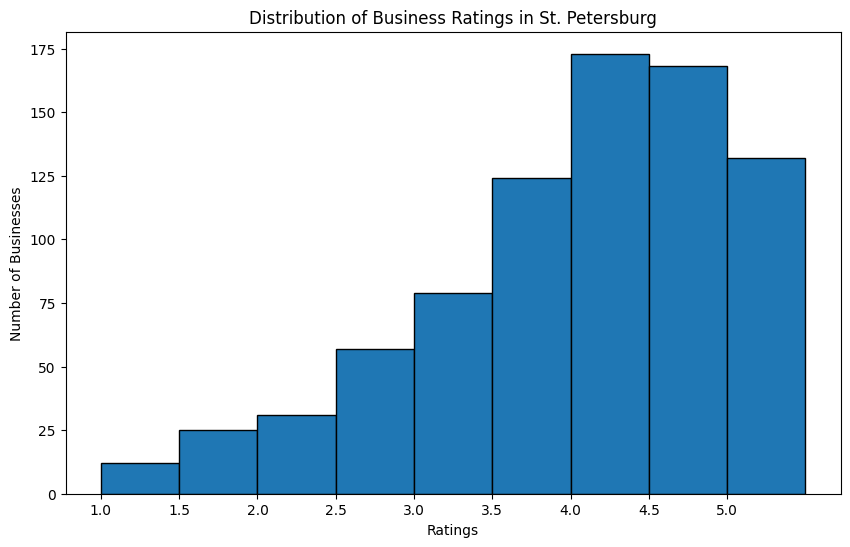

In [73]:
import matplotlib.pyplot as plt

businesses_in_st_petersburg = businesses[businesses['city'].str.lower() == 'st. petersburg']
plt.figure(figsize=(10, 6))
plt.hist(businesses_in_st_petersburg['stars'], bins=np.arange(1, 6, 0.5), edgecolor='black')
plt.title('Distribution of Business Ratings in St. Petersburg')
plt.xlabel('Ratings')
plt.ylabel('Number of Businesses')
plt.xticks(np.arange(1, 5.5, 0.5))
plt.show()

# 5. Filtering Top 10"Cocktail Bars" with outdoorseating

In [83]:
import ast

def is_cocktail_bar(categories_str):
    categories = str(categories_str).split(',')
    return 'Cocktail Bars' in categories

def has_outdoor_seating(attributes_str):
    try:
        attributes = ast.literal_eval(str(attributes_str)) if isinstance(attributes_str, str) else {}
        return attributes.get("OutdoorSeating", "False") == "True"
    except ValueError as e:
        print(f"Error parsing attributes: {attributes_str}, Error: {e}")
        return False


cocktail_bars = businesses[businesses['categories'].apply(is_cocktail_bar)].copy()
cocktail_bars['has_outdoor_seating'] = cocktail_bars['attributes'].apply(has_outdoor_seating)
cocktail_bars_with_seating = cocktail_bars[cocktail_bars['has_outdoor_seating']]

top_10_cocktail_bars = cocktail_bars_with_seating.sort_values(by='stars', ascending=False).head(10)
print(top_10_cocktail_bars[['name', 'city', 'stars', 'attributes']])

                          name           city  stars  \
37500             Cellar House       St Louis    5.0   
91203                    Trust      St. Louis    5.0   
25823   Native Cocktail Events          Tampa    5.0   
43752   Batture Bistro and Bar    New Orleans    5.0   
41043                    Amari           Reno    5.0   
27121  Cooper River Distillers         Camden    4.5   
75898   Quitutes Cuisine & Bar          Arabi    4.5   
73102              Shaker Mill  Santa Barbara    4.5   
70181        Strandhill Public          Tampa    4.5   
99806  Bywater American Bistro    New Orleans    4.5   

                                              attributes  
37500  {'GoodForMeal': "{'dessert': False, 'latenight...  
91203  {'RestaurantsTakeOut': 'False', 'HappyHour': '...  
25823  {'HappyHour': 'True', 'BusinessParking': "{'ga...  
43752  {'Caters': 'True', 'Alcohol': "u'full_bar'", '...  
41043  {'OutdoorSeating': 'True', 'HasTV': 'False', '...  
27121  {'HasTV': 'False', 'Wh